# ___

# [ Machine Learning in Geosciences ]



Lecturer: *Lukas Brodsky lukas.brodsky@natur.cuni.cz*

**Department of Applied Geoinformatics and Carthography, Charles University** 

___

## GeoPandas & Rasterio

This notebook demonstrates how to combine vectors and rasters in Python workflow. 

## Rasterizing poylgons

In [ ]:
import os 
import geopandas as gpd 
import rasterio as rio
from rasterio import features
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
# Reading vector 
# CHANGE TO YOUR PATH!!!
path = '/Users/lukas/Work/prfuk/vyuka/erasmus_ml_geography/data/'
filename = 'polygons.shp'
path_fn_vec = os.path.join(path, filename)
gdf = gpd.read_file(path_fn_vec)

In [ ]:
gdf.head()

In [ ]:
geometry = gdf['geometry'] 

In [ ]:
geometry

In [ ]:
# Reading example raster 
raster_filename = 'landsat.tif' 
path_fn_ras = os.path.join(path, raster_filename)
ds = rio.open(path_fn_ras)
ds

In [ ]:
# Raster file metadata 
meta = ds.meta
print(type(meta))
print('Metadata od the dataset: ...')
for k in meta:
    print(k, meta[k])

In [ ]:
meta['width']

In [ ]:
meta['count'] = 1

In [ ]:
meta

In [ ]:
# out filename 
out_fn_ras = os.path.join(path, 'rasterized_poly.tif')

In [ ]:
# write the raster 
with rio.open(out_fn_ras, 'w+', **meta) as out:
    out_arr = out.read(1)

    # this is where we create a generator of geom, value pairs to use in rasterizing
    shapes = ((geom, value) for geom, value in zip(gdf.geometry, gdf.label))

    burned = features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)
    out.write_band(1, burned)


In [ ]:
os.path.isfile(out_fn_ras)

In [ ]:
# Check the rasterization! 
rio_ds = rio.open(out_fn_ras)
rio_arr = rio_ds.read(1)
rio_arr.shape

In [ ]:
plt.imshow(rio_arr)
plt.colorbar()

In [ ]:
np.unique(rio_arr)

In [ ]:
B1 = ds.read(1)
plt.imshow(B1, cmap='gray')
plt.colorbar()

### Raster Vector overlay 


In [ ]:
# bands
ds.indexes

In [ ]:
image_arr = np.dstack([ds.read(b) for b in ds.indexes])

In [ ]:
image_arr.shape

In [ ]:
rio_arr.shape 

In [ ]:
image_arr.shape

In [ ]:
# Display them
plt.subplot(131)
plt.imshow(image_arr[:, :, 2], cmap=plt.cm.Greys_r)
plt.title('Red band')

plt.subplot(132)
plt.imshow(image_arr[:, :, 5], cmap=plt.cm.Greys_r)
plt.title('SWIR band')

plt.subplot(133)
plt.imshow(rio_arr, cmap=plt.cm.Spectral, interpolation='nearest')
plt.title('ROI Training Data')

plt.show()

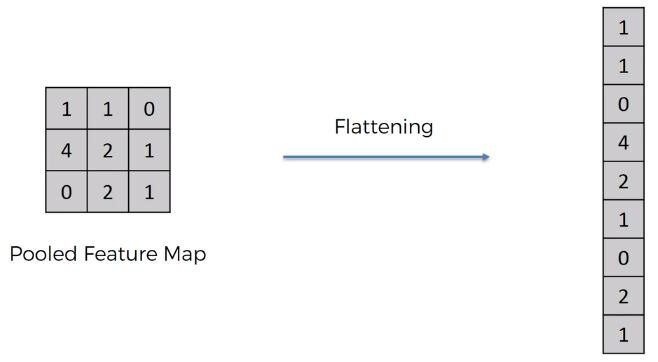

In [ ]:
rio_arr.shape

In [ ]:
flattened_rio = rio_arr[rio_arr > 0]
flattened_rio.shape

In [ ]:
image_arr[rio_arr > 0, :].shape

In [ ]:
# my data for Machine Learning 
X = image_arr[rio_arr > 0, :] 
y = rio_arr[rio_arr > 0]

In [ ]:
# X.shape

In [ ]:
print('Our X matrix is sized: {sz}'.format(sz=X.shape))
print('Our y array is sized: {sz}'.format(sz=y.shape))